In [3]:
!pip install matplotlib
!pip install seaborn

     |████████████████████████████████| 288 kB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.4 MB 84.1 MB/s eta 0:00:01     |██                              | 573 kB 84.1 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
train = pd.read_csv('./data/train_ratings.csv')
users = pd.read_csv('./data/users.csv')
books = pd.read_csv('./data/books.csv')

In [8]:
books[books.columns.difference(['category'])]

,book_author,book_title,img_path,img_url,isbn,language,publisher,summary,year_of_publication
0,Richard Bruce Wright,Clara Callan,images/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.0...,0002005018,en,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",2001.0
1,Carlo D'Este,Decision in Normandy,images/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.0...,0060973129,en,HarperPerennial,"Here, for the first time in paperback, is an o...",1991.0
2,Gina Bari Kolata,Flu: The Story of the Great Influenza Pandemic...,images/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.0...,0374157065,en,Farrar Straus Giroux,"Describes the great flu epidemic of 1918, an o...",1999.0
3,Amy Tan,The Kitchen God's Wife,images/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.0...,0399135782,en,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,1991.0
4,Robert Cowley,What If?: The World's Foremost Military Histor...,images/0425176428.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0425176428.0...,0425176428,en,Berkley Publishing Group,"Essays by respected military historians, inclu...",2000.0
...,...,...,...,...,...,...,...,...,...
149565,P.J. O'Rourke,The Bachelor Home Companion: A Practical Guide...,images/067161746X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067161746X.0...,067161746X,en,Pocket Books,A tongue-in-cheek survival guide for single pe...,1987.0
149566,Sam Lightner,All Elevations Unknown: An Adventure in the He...,images/0767907566.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0767907566.0...,0767907566,en,Broadway Books,A daring twist on the travel-adventure genre t...,2001.0
149567,Claude Dooley,Why stop?: A guide to Texas historical roadsid...,images/0884159221.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0884159221.0...,0884159221,NaN,Lone Star Books,NaN,1985.0
149568,Jeremy Lloyd,The Are You Being Served? Stories: 'Camping In...,images/0912333022.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0912333022.0...,0912333022,en,Kqed Books,These hilarious stories by the creator of publ...,1997.0


In [28]:
books[['book_title','book_author']].duplicated().sum()

10065

In [37]:
books[books[['book_title','book_author']].duplicated()].groupby(['book_title','book_author'])['summary'].unique()

array([nan,
       'A nightmare of evil grips a small Maine town when a mysterious\nstranger appears'],
      dtype=object)

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [46]:
arr =np.array([1,2,3,np.nan])
df = pd.DataFrame(arr)
df[0].unique()


array([ 1.,  2.,  3., nan])

In [42]:
books[books.category.notnull()].isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_url                0
language               0
category               0
summary                0
img_path               0
dtype: int64

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306795 entries, 0 to 306794
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  306795 non-null  int64 
 1   isbn     306795 non-null  object
 2   rating   306795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [42]:
df = users.merge(train, how = 'left', on = 'user_id').merge(books, how = 'left', on =  'isbn')

In [43]:
df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,"timmins, ontario, canada",NaN,0002005018,4.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,8,"timmins, ontario, canada",NaN,074322678X,4.0,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg
2,8,"timmins, ontario, canada",NaN,0887841740,2.0,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg
3,8,"timmins, ontario, canada",NaN,1552041778,2.0,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg
4,8,"timmins, ontario, canada",NaN,1567407781,6.0,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg


# Users.csv

In [3]:
users.info() # age 결측치 : 27833 : 약 41%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
users['age'].describe() # mean ~= median

count    40259.000000
mean        36.069873
std         13.842571
min          5.000000
25%         25.000000
50%         34.000000
75%         45.000000
max         99.000000
Name: age, dtype: float64

## AGE

<AxesSubplot: >

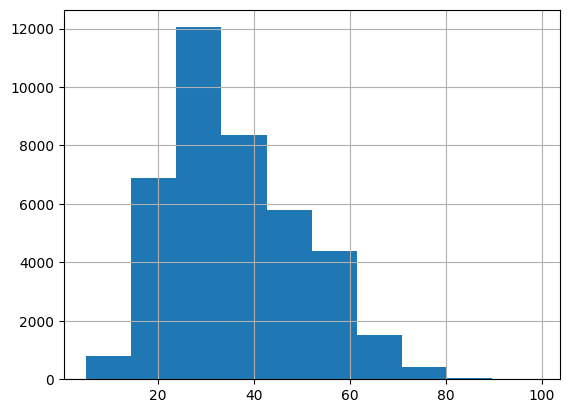

In [5]:
users['age'].hist()

- 30, 40, 20, 50, 60 순
- baseline 코드 처럼 mean값으로 처리하는 것에 문제는 없어보임

In [47]:
!pip install statsmodels

     |████████████████████████████████| 9.9 MB 20.0 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 91.8 MB/s eta 0:00:01


## Age 분포

In [160]:
# age grouping

def age_grouping(age) : 
    if age < 20 : return 1
    elif (20 <= age) & (age < 30) : return 2
    elif (30 <= age) & (age < 40) : return 3
    elif (40 <= age) & (age < 50) : return 4
    elif (50 <= age) & (age < 60) : return 5
    else : return 6

In [161]:
df['age'] = df['age'].fillna(df['age'].mean()).map(age_grouping)

<AxesSubplot: >

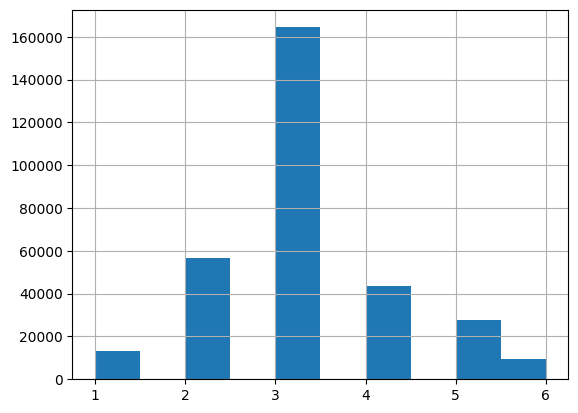

In [162]:
df['age'].hist()

In [52]:
# linear regression on age

import statsmodels.api as sm

y = df['rating'].fillna(df['rating'].mean())
x = sm.add_constant(df['age'].fillna(df['age'].mean()))
lm = sm.OLS(y,x).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     108.2
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           2.46e-25
Time:                        02:22:48   Log-Likelihood:            -7.2301e+05
No. Observations:              315084   AIC:                         1.446e+06
Df Residuals:                  315082   BIC:                         1.446e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9110      0.016    436.133      0.0

In [62]:
df[['rating', 'age']].fillna({'rating':df['rating'].mean(), 'age':df['age'].mean()}).corr()

,rating,age
rating,1.000000,0.018528
age,0.018528,1.000000


<AxesSubplot: xlabel='age'>

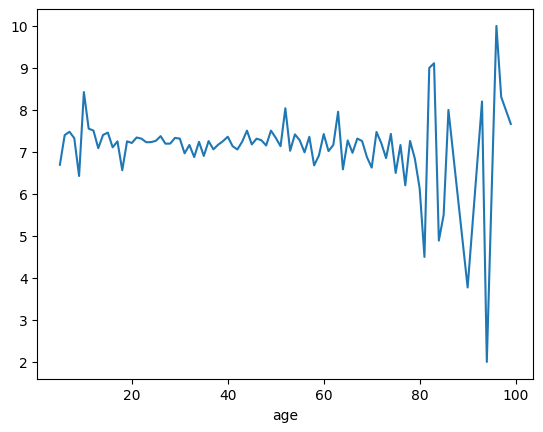

In [64]:
df.dropna().groupby('age')['rating'].mean().plot()

In [69]:
df['rating'].value_counts()

8.0     73593
7.0     52928
9.0     48673
10.0    42774
6.0     25311
5.0     14111
1.0     13249
2.0     12929
4.0     12707
3.0     10520
Name: rating, dtype: int64

- 상위 5개만 보았을 때, 연령별로 카테고리의 인기 순위는 큰 차이가 없다. 

1. 지역별로 어느 연령대가 많이 분포가 되어있는지

In [163]:
df['city'] = df['location'].str.split(', ').str[0]
df['state'] = books['location'].str.split(', ').str[1]
books['country'] = books['location'].str.split(', ').str[2]

In [165]:
books[books['country']=='france']['age'].value_counts()

2    1815
3    1153
4     395
5     217
1     201
6      11
Name: age, dtype: int64

In [175]:
for state in books['state'].value_counts()[:10].index : 
    print(f"{state} : ",df[df['state'] == state]['age'].value_counts().index[0])

california :  3
ontario :  3
texas :  3
new york :  3
georgia :  5
n/a :  3
florida :  3
illinois :  3
washington :  3
pennsylvania :  3


- 지역별 연령대의 분포에 대한 편차는 크지 않은것으로 보인다

## Location

In [6]:
city = users['location'].map(lambda x: x.split(',')[0])
state = users['location'].map(lambda x: x.split(',')[1])
country = users['location'].map(lambda x: x.split(',')[2])

<BarContainer object of 347 artists>

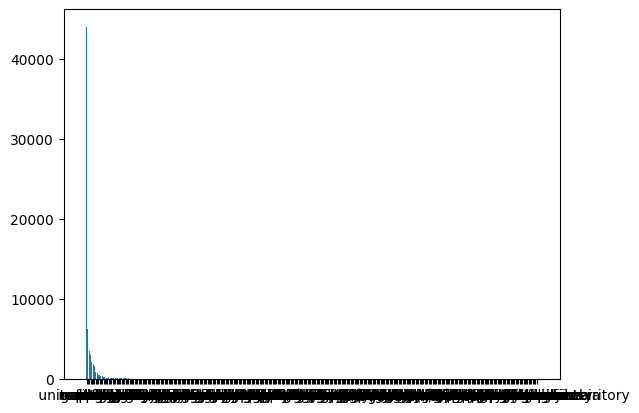

In [7]:
plt.bar(country.value_counts().index, country.value_counts().values)

In [8]:
country.value_counts()

 usa                             43991
 canada                           6208
 germany                          3526
 united kingdom                   2914
                                  2101
                                 ...  
 district of columbia                1
 west indies                         1
 kosovo                              1
 tonga                               1
 australian capital territory        1
Name: location, Length: 347, dtype: int64

In [9]:
country.value_counts()[:10]

 usa               43991
 canada             6208
 germany            3526
 united kingdom     2914
                    2101
 australia          1791
 spain              1653
 france              794
 italy               770
 switzerland         451
Name: location, dtype: int64

- 지역별 편차가 큼
    - __sampling시 고려사항__

# State (미국)

In [179]:
df[df['country'] == 'usa']['state'].value_counts()

california                     29330
texas                          12476
new york                       10678
georgia                        10588
florida                         9101
                               ...  
wv                                 1
northern marianas provinces        1
cascadia                           1
veneto                             1
ne                                 1
Name: state, Length: 159, dtype: int64

- 미국 내 state에서도 편차가 큼
    - sampling시 고려사항

In [182]:
df['country'].nunique()

330

# BOOKS

In [15]:
books = pd.read_csv('./data/books.csv')
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [16]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


## Category(Genre)

In [17]:
books['category'].value_counts()[:10]

['Fiction']                      32956
['Juvenile Fiction']              5804
['Biography & Autobiography']     3320
['History']                       1925
['Religion']                      1818
['Juvenile Nonfiction']           1417
['Social Science']                1231
['Humor']                         1161
['Body, Mind & Spirit']           1109
['Business & Economics']          1070
Name: category, dtype: int64

- 편차가 큼
    - sampling

## category - ratings

In [18]:
train_ratings = pd.read_csv('./data/train_ratings.csv')
test_ratings = pd.read_csv('./data/test_ratings.csv')

In [19]:
ratings = pd.concat([train_ratings, test_ratings], axis = 0)
ratings.duplicated().sum() # 중복 없음

0

In [20]:
ratings.shape

(383494, 3)

In [21]:
books.isbn.nunique(0)

149570

In [22]:
books_ratings = books.merge(ratings, on = 'isbn')
books_ratings.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,8,4
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,67544,7
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,123629,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,200273,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,210926,9


In [23]:
books_ratings.groupby('category')['rating'].describe().sort_values(by = 'count', ascending = False)[:20]

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
['Fiction'],135658.0,5.585059,3.527490,0.0,2.0,7.0,8.0,10.0
['Juvenile Fiction'],15041.0,6.010172,3.689651,0.0,2.0,7.0,9.0,10.0
['Biography & Autobiography'],9547.0,5.804022,3.589161,0.0,2.0,7.0,9.0,10.0
['Humor'],3936.0,5.859756,3.629632,0.0,2.0,7.0,9.0,10.0
['History'],3353.0,5.815687,3.622313,0.0,2.0,7.0,9.0,10.0
['Religion'],2976.0,5.971438,3.673963,0.0,2.0,7.0,9.0,10.0
"['Body, Mind & Spirit']",2169.0,5.745044,3.696389,0.0,2.0,7.0,9.0,10.0
['Juvenile Nonfiction'],2070.0,5.871981,3.711638,0.0,2.0,7.0,9.0,10.0
['Social Science'],2057.0,5.609140,3.561696,0.0,2.0,7.0,8.0,10.0


- category별로 rating의 분포가 비슷해서 sampling시 따로 구분하지 않아도 문제가 없을것 같다.
    - outlier가 아닌 이상 category 자체가 rating에 미치는 영향은 적다고 볼 수 있을 것 같다

## Language

In [24]:
books_ratings.groupby('language')['rating'].describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
en,227862.0,5.671011,3.572905,0.0,2.00,7.0,8.00,10.0
de,2761.0,5.371604,3.595021,0.0,1.00,7.0,8.00,10.0
es,1850.0,5.556757,3.429625,0.0,2.00,7.0,8.00,10.0
fr,1485.0,5.633670,3.538841,0.0,1.00,7.0,8.00,10.0
it,366.0,5.983607,3.476694,0.0,4.00,7.0,8.75,10.0
nl,97.0,5.061856,3.141836,0.0,2.00,6.0,8.00,10.0
pt,66.0,6.590909,3.328096,0.0,6.00,8.0,9.00,10.0
da,50.0,6.600000,3.200765,0.0,6.00,8.0,9.00,10.0
ca,30.0,4.700000,3.239306,0.0,1.00,5.5,7.00,10.0


## Author

In [269]:
df.book_author.nunique()

54716

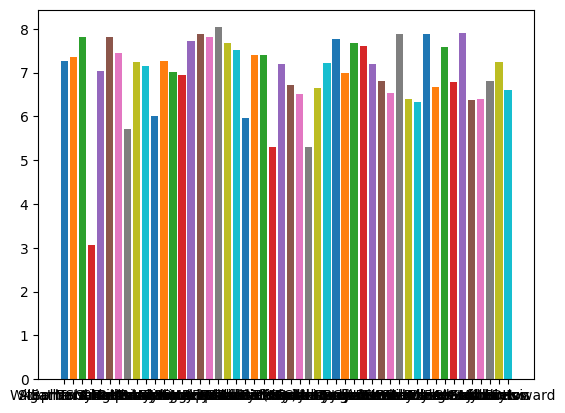

In [204]:
# 책을 많이 쓴 저자 상위 10명
top10_authors = df[['book_author', 'isbn','rating']].groupby('book_author')['isbn'].nunique().sort_values(ascending = False)[:50]

for author in top10_authors.index : 
    plt.bar(author, df[df['book_author'] == author]['rating'].mean())


In [242]:
df['country']

0         canada
1         canada
2         canada
3         canada
4         canada
           ...  
315079       usa
315080    canada
315081       usa
315082       usa
315083       usa
Name: country, Length: 315084, dtype: object

In [248]:
tmp = df.set_index('country')

In [264]:
df.groupby('country')['rating'].count()> 1000

country
,                False
\"n/a\""         False
aberdeenshire    False
afghanistan      False
alachua          False
                 ...  
ysa              False
yugoslavia       False
zambia           False
zimbabwe         False
álava            False
Name: rating, Length: 330, dtype: bool

In [268]:
(df.groupby('country')['rating'].count()> 1000)

country
,                False
\"n/a\""         False
aberdeenshire    False
afghanistan      False
alachua          False
                 ...  
ysa              False
yugoslavia       False
zambia           False
zimbabwe         False
álava            False
Name: rating, Length: 330, dtype: bool

<BarContainer object of 330 artists>

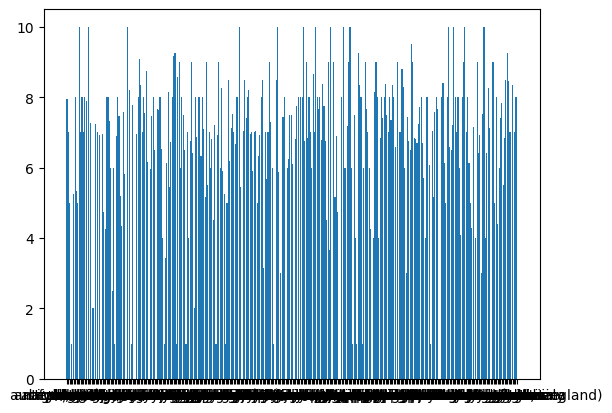

In [210]:
plt.bar(df.groupby('country')['rating'].mean().index, df.groupby('country')['rating'].mean().values)

# cold start user

In [15]:
test = pd.read_csv('./data/test_ratings.csv')

In [16]:
train.head()

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9


In [17]:
test.head()

,user_id,isbn,rating
0,11676,0002005018,0
1,116866,0002005018,0
2,152827,0060973129,0
3,157969,0374157065,0
4,67958,0399135782,0


In [18]:
train.user_id.unique()

array([     8,  67544, 123629, ..., 278636, 278659, 278713])

In [19]:
test.user_id.unique()

array([ 11676, 116866, 152827, ..., 277680, 278257, 278543])

In [26]:
cold_starter = list(set(test.user_id.unique()) - set(train.user_id.unique()))

In [27]:
len(cold_starter)

8266

In [31]:
print(f"cold start ratio : {len(cold_starter)/len(test) * 100:>0.2f} %")

cold start ratio : 10.78 %


# Feature 별 결측치 

## Users
- age : 41%

In [32]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


## Location

In [1]:
import re

In [16]:
users['location']

0                  timmins, ontario, canada
1                   ottawa, ontario, canada
2                             n/a, n/a, n/a
3                  toronto, ontario, canada
4        victoria, british columbia, canada
                        ...                
68087           danville, pennsylvania, usa
68088            victoria, delaware, canada
68089               irvington, alabama, usa
68090            vancouver, washington, usa
68091          albuquerque, new mexico, usa
Name: location, Length: 68092, dtype: object

In [31]:
#location이 null값인 index
location_null = np.where(users['location'].str.split(', ').str[-1].replace('n/a', np.nan).isnull())

users.iloc[location_null]['location'] = np.nan # nan 값으로 처리

## Age
- 전체 age의 데이터 분포대로 fillna

In [127]:
age_null = users['age'].isnull()

# test set의 연령 분포를 이용해서 Imputation? -> cheating인가? -> train set과 분포가 비슷하니 그냥 train set 분포대로 pick해도 될듯

In [128]:
age_not_null = users['age'].notnull()

In [129]:
age_dist = users[age_not_null]['age'].value_counts(normalize = True)

In [130]:
np.random.choice(age_dist.index, size = len(age_null), p = age_dist.values)

array([52., 46., 45., ..., 25., 23., 22.])

In [131]:
users.loc[age_null,'age']

0       NaN
2       NaN
6       NaN
7       NaN
9       NaN
         ..
68074   NaN
68075   NaN
68084   NaN
68085   NaN
68089   NaN
Name: age, Length: 27833, dtype: float64

<AxesSubplot: >

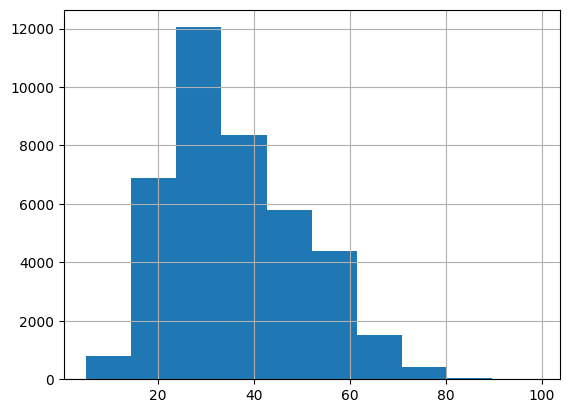

In [132]:
users.age.hist()

In [133]:
users.loc[age_null, 'age'] = np.random.choice(age_dist.index, size = age_null.sum(), p = age_dist.values)

In [134]:
users.age.value_counts()

29.0    2205
26.0    2126
25.0    2080
27.0    2057
34.0    2053
        ... 
89.0       3
96.0       2
97.0       1
98.0       1
92.0       1
Name: age, Length: 91, dtype: int64

<AxesSubplot: >

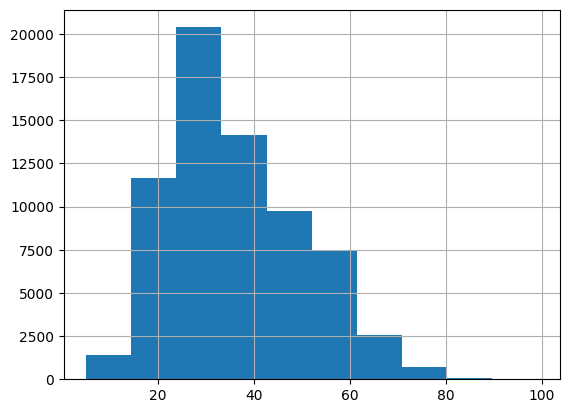

In [164]:
users.age.hist()

## Books

In [165]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


### Language
- book_title을 이용해 language 분류 가능!

In [166]:
print("language null : ", books.language.isnull().sum(), f"ratio : {books.language.isnull().sum()/len(books)*100:0.2f}" )
print("category null : ", books.category.isnull().sum(), f"ratio : {books.category.isnull().sum()/len(books)*100:0.2f}" )
print("summary null : ", books.summary.isnull().sum(), f"ratio : {books.summary.isnull().sum()/len(books)*100:0.2f}" )

language null :  67227 ratio : 44.95
category null :  68851 ratio : 46.03
summary null :  67227 ratio : 44.95


In [176]:
tmp_books = books[books.language.notnull()]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
149562,0670528951,Orson Welles,Barbara Leaming,1985.0,Penguin USA,http://images.amazon.com/images/P/0670528951.0...,en,['Biography & Autobiography'],"Based on two years of interviews and research,...",images/0670528951.01.THUMBZZZ.jpg
149563,0689818904,My Grandmother's Journey,John Cech,1998.0,Aladdin,http://images.amazon.com/images/P/0689818904.0...,en,['Juvenile Fiction'],A grandmother tells the story of her eventful ...,images/0689818904.01.THUMBZZZ.jpg
149565,067161746X,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987.0,Pocket Books,http://images.amazon.com/images/P/067161746X.0...,en,['Humor'],A tongue-in-cheek survival guide for single pe...,images/067161746X.01.THUMBZZZ.jpg
149566,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,en,['Nature'],A daring twist on the travel-adventure genre t...,images/0767907566.01.THUMBZZZ.jpg


In [203]:
def make_features(tmp_books) : # trainset + testset

    from itertools import permutations
    import collections

    # Define a list of commonly found punctuations
    punc = ('!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?")
    vowels=['a','e','i','o','u']
    # Define a list of double consecutive vowels which are typically found in Dutch and Afrikaans languages
    same_consecutive_vowels = ['aa','ee', 'ii', 'oo', 'uu'] 
    consecutive_vowels = [''.join(p) for p in permutations(vowels,2)]
    dutch_combos = ['ij']

    # Create a pre-defined set of features based on the "text" column in order to allow us to characterize the string
    tmp_books['word_count'] = tmp_books['book_title'].apply(lambda x : len(x.split()))
    tmp_books['character_count'] = tmp_books['book_title'].apply(lambda x : len(x.replace(" ","")))
    tmp_books['word_density'] = tmp_books['word_count'] / (tmp_books['character_count'] + 1)
    tmp_books['punc_count'] = tmp_books['book_title'].apply(lambda x : len([a for a in x if a in punc]))
    tmp_books['v_char_count'] = tmp_books['book_title'].apply(lambda x : len([a for a in x if a.casefold() == 'v']))
    tmp_books['w_char_count'] = tmp_books['book_title'].apply(lambda x : len([a for a in x if a.casefold() == 'w']))
    tmp_books['ij_char_count'] = tmp_books['book_title'].apply(lambda x : sum([any(d_c in a for d_c in dutch_combos) for a in x.split()]))
    tmp_books['num_double_consec_vowels'] = tmp_books['book_title'].apply(lambda x : sum([any(c_v in a for c_v in same_consecutive_vowels) for a in x.split()]))
    tmp_books['num_consec_vowels'] = tmp_books['book_title'].apply(lambda x : sum([any(c_v in a for c_v in consecutive_vowels) for a in x.split()]))
    tmp_books['num_vowels'] = tmp_books['book_title'].apply(lambda x : sum([any(v in a for v in vowels) for a in x.split()]))
    tmp_books['vowel_density'] = tmp_books['num_vowels']/tmp_books['word_count']
    tmp_books['capitals'] = tmp_books['book_title'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    tmp_books['caps_vs_length'] = tmp_books.apply(lambda row: float(row['capitals'])/float(row['character_count']),axis=1)
    tmp_books['num_exclamation_marks'] = tmp_books['book_title'].apply(lambda x: x.count('!'))
    tmp_books['num_question_marks'] = tmp_books['book_title'].apply(lambda x: x.count('?'))
    tmp_books['num_punctuation'] = tmp_books['book_title'].apply(lambda x: sum(x.count(w) for w in punc))
    tmp_books['num_unique_words'] = tmp_books['book_title'].apply(lambda x: len(set(w for w in x.split())))
    tmp_books['num_repeated_words'] = tmp_books['book_title'].apply(lambda x: len([w for w in collections.Counter(x.split()).values() if w > 1]))
    tmp_books['words_vs_unique'] = tmp_books['num_unique_words'] / tmp_books['word_count']
    tmp_books['encode_ascii'] = np.nan
    
    for i in range(len(tmp_books)):
        try:
            tmp_books['book_title'].iloc[i].encode(encoding='utf-8').decode('ascii')
        except UnicodeDecodeError:
            tmp_books['encode_ascii'].iloc[i] = 0
        else:
            tmp_books['encode_ascii'].iloc[i] = 1
    
    return tmp_books

def train_test_split(tmp_books) : 
    
    test = tmp_books[tmp_books.language.isnull()]
    train = tmp_books[tmp_books.language.notnull()]
    
    feature_cols = tmp_books.columns[10:]
    # X = tmp_books[feature_cols]
    # y = tmp_books['language']
    
    X_test = test[feature_cols]
    y_test = test['language']
    
    X_train = train[feature_cols]
    y_train = train['language']

    # from sklearn.model_selection import train_test_split
    
    # X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)
    
    data = {
        'X_train' : X_train,
        'X_test' : X_test,
        'y_train' : y_train,
        'y_valid' : y_test
    }
    
    return data

def fit_scaling_n_pca(data) : #trainset only
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    # Standardize the data
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(data['X_train'])

    # Make an instance of the model to retain 95% of the variance within the old features.
    pca = PCA(.95)
    pca.fit(data['X_train'])
    
    return scaler, pca

def transform(data, scaler, pca) : # train + test set 
    data['X_train'] = scaler.transform(data['X_train'])
    data['X_train'] = pca.transform(data['X_train'])
    data['X_test'] = scaler.transform(data['X_test'])
    data['X_test'] = pca.transform(data['X_test'])
    
    return data

def train_RF(data, train = True) : 
    
    if train : 
        from sklearn.ensemble import RandomForestClassifier
        
        rf_clf = RandomForestClassifier(n_estimators=100) # Create Random Forest classifer object
        rf_clf = rf_clf.fit(data['X_train'],data['y_train']) # Fit/Train Random Forest Classifer on training set
    else : 
        pass
    
    return rf_clf

def test_RF(rf_clf, data, train = False) : 
    
    y_pred = rf_clf.predict(data['X_test']) #Predict the response for test dataset
    
    return y_pred

def fill_lang(df, y_pred) : 
    df.loc[df.language.isnull(), 'language'] = y_pred
    
    return df


In [204]:
new_books = books.copy()
new_books = make_features(new_books)
data = train_test_split(new_books)
scaler, pca = fit_scaling_n_pca(data)
data = transform(data, scaler, pca)
rf_clf = train_RF(data, train = True)
y_pred = test_RF(rf_clf, data)
new_books = fill_lang(new_books, y_pred)

In [205]:
new_books.language.isnull().sum()

0

In [47]:
new_books.iloc[:,:10]

NameError: name 'new_books' is not defined

In [332]:
new_books.to_csv('./books_lang.csv', index = False)

In [182]:
tmp_books.groupby('language').mean().T

language,ca,da,de,el,en,eo,es,fa,fr,ga,...,ms,nl,no,pt,ro,ru,th,vi,zh-CN,zh-TW
year_of_publication,1995.608696,1995.081081,1997.488300,2003.000000,1995.354871,1992.000,1997.334317,1378.000000,1996.088335,1993.000000,...,2000.200000,1990.850746,1990.000000,1996.127660,1999.000000,1995.000000,2003.000000,1997.000000,1998.000000,1999.000000
word_count,6.347826,4.432432,4.877535,2.000000,6.387552,3.000,5.113078,4.000000,4.562854,6.000000,...,3.300000,4.358209,3.666667,7.085106,7.000000,7.666667,6.000000,12.000000,7.000000,5.000000
character_count,37.304348,23.756757,29.250390,14.000000,33.714411,24.000,26.479843,29.000000,23.764439,43.000000,...,21.200000,26.611940,19.333333,38.212766,40.000000,39.333333,40.000000,70.000000,26.666667,22.000000
word_density,0.165408,0.183284,0.161178,0.133333,0.186176,0.120,0.191382,0.133333,0.187410,0.136364,...,0.151218,0.156814,0.173810,0.186770,0.170732,0.186956,0.146341,0.169014,0.295169,0.217391
punc_count,0.434783,0.837838,1.797192,0.000000,0.493282,0.000,0.259587,2.000000,0.838052,0.000000,...,0.200000,0.552239,0.000000,0.382979,4.000000,1.000000,0.000000,0.000000,0.333333,1.000000
v_char_count,0.478261,0.270270,0.210608,0.000000,0.359426,0.000,0.319567,0.000000,0.325028,0.000000,...,0.100000,0.552239,0.666667,0.489362,0.000000,1.000000,0.000000,0.000000,0.333333,0.000000
w_char_count,0.000000,0.297297,0.290172,0.000000,0.474392,0.000,0.039331,0.000000,0.011325,0.000000,...,0.000000,0.268657,0.166667,0.042553,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
ij_char_count,0.000000,0.000000,0.001560,0.000000,0.000292,0.000,0.012783,0.000000,0.000000,0.000000,...,0.000000,0.119403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
num_double_consec_vowels,0.000000,0.054054,0.045242,0.000000,0.237875,0.000,0.023599,0.000000,0.010193,0.000000,...,0.000000,0.328358,0.166667,0.063830,0.000000,0.000000,0.000000,1.000000,0.333333,1.000000
num_consec_vowels,0.869565,0.648649,1.148986,0.000000,1.088832,2.000,0.976401,0.000000,1.233296,3.000000,...,0.800000,1.089552,0.000000,1.510638,0.000000,0.333333,2.000000,4.000000,0.666667,1.000000


In [57]:
b = pd.read_csv('./books_lang.csv')
b.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path', 'word_count',
       'character_count', 'word_density', 'punc_count', 'v_char_count',
       'w_char_count', 'ij_char_count', 'num_double_consec_vowels',
       'num_consec_vowels', 'num_vowels', 'vowel_density', 'capitals',
       'caps_vs_length', 'num_exclamation_marks', 'num_question_marks',
       'num_punctuation', 'num_unique_words', 'num_repeated_words',
       'words_vs_unique', 'encode_ascii'],
      dtype='object')

In [59]:
b = b.iloc[:,:10]
b.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')

In [60]:
b.to_csv('./books_lang.csv', index = False)

In [185]:
tmp_books.columns[10:]

Index(['word_count', 'character_count', 'word_density', 'punc_count',
       'v_char_count', 'w_char_count', 'ij_char_count',
       'num_double_consec_vowels', 'num_consec_vowels', 'num_vowels',
       'vowel_density', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
       'num_question_marks', 'num_punctuation', 'num_unique_words',
       'num_repeated_words', 'words_vs_unique', 'encode_ascii'],
      dtype='object')

In [190]:
feature_cols = tmp_books.columns[10:]
X = tmp_books[feature_cols]
y = tmp_books['language']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Transform both the training set and the test set.
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

# Make an instance of the model to retain 95% of the variance within the old features.
pca = PCA(.95)
pca.fit(X_train)

print('Number of Principal Components = '+str(pca.n_components_))
# Number of Principal Components = 13

X_train = pca.transform(X_train)
X_valid = pca.transform(X_valid)


Number of Principal Components = 12


In [193]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100) # Create Random Forest classifer object
rf_clf = rf_clf.fit(X_train,y_train) # Fit/Train Random Forest Classifer on training set

# # Save model to file in the current working directory so that it can be imported and used.
# pkl_file = "random_forest_model.pkl"
# with open(pkl_file, 'wb') as file:
#     pickle.dump(rf_clf, file)

# # Load previously trained model from pickle file
# with open(pkl_file, 'rb') as file:
#     rf_clf = pickle.load(file)
# rf_clf

y_pred = rf_clf.predict(X_valid) #Predict the response for test dataset

In [196]:
# validation 결과

from sklearn.metrics import accuracy_score
accuracy_score_rf = accuracy_score(y_valid, y_pred)
accuracy_score_rf

0.961746311251442

### Category
1. category 묶기
2. 결측치 처리

In [209]:
books.category.isnull().sum()

68851

In [268]:
books.summary.isnull().sum()

67227

In [267]:
books[books.category.isnull()]['summary'].isnull().sum()

67227

In [227]:
# category 특수문자 [,'지우기

cat_unique = books[books.category.notnull()].category.str.replace(r"\[|\]|'", '', regex = True).unique()
len(cat_unique)

4291

In [262]:
# category embedding

# 1. remove special chars & tokenizing
cat_tokens = books[books.category.notnull()].category.str.replace(r"[^\w]", ' ', regex = True).str.split(' ').str[2:-2].values


In [266]:
cat_tokens

array([list(['Actresses']), list(['1940', '1949']), list(['Medical']),
       ..., list(['Humor']), list(['Nature']), list(['Fiction'])],
      dtype=object)

In [256]:
# 2. word2vec
!pip install gensim

     |████████████████████████████████| 24.1 MB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 13.4 MB/s eta 0:00:01


In [263]:
# 2. word2vec
from gensim.models import Word2Vec
model = Word2Vec(cat_tokens)

In [265]:
model.wv.most_similar('Nonfiction')

[('Fiction', 0.9740858674049377),
 ('North', 0.4244236350059509),
 ('life', 0.4182770550251007),
 ('Great', 0.41682738065719604),
 ('Conduct', 0.41677868366241455),
 ('Adult', 0.4148251712322235),
 ('Bildungsromans', 0.4127874970436096),
 ('Young', 0.4113054871559143),
 ('Crime', 0.40681371092796326),
 ('Dragons', 0.40289998054504395)]

In [280]:
# k-modes clustering

category_ss = books[books.category.notnull()]['category'].str[2:-2]
category_ss.unique()
dic = {}
for idx, cat in enumerate(category_ss.unique()) : 
    dic[cat] = idx
    
dic

{'Actresses': 0,
 '1940-1949': 1,
 'Medical': 2,
 'Fiction': 3,
 'History': 4,
 'Nature': 5,
 'Humor': 6,
 'Cooking': 7,
 'Reference': 8,
 'Juvenile Fiction': 9,
 'Canadian fiction': 10,
 'Health & Fitness': 11,
 'FICTION': 12,
 'Control (Psychology)': 13,
 'Cholistan Desert (Pakistan)': 14,
 'Science': 15,
 'Conduct of life': 16,
 'Horses': 17,
 'Political Science': 18,
 'Brothers': 19,
 'Baggins, Frodo (Fictitious character)': 20,
 'Biography & Autobiography': 21,
 'Business & Economics': 22,
 'Americans': 23,
 'Infanticide': 24,
 'Cabala': 25,
 'Literary Criticism': 26,
 'Self-Help': 27,
 'American fiction': 28,
 'Humorous stories': 29,
 'Diary fiction': 30,
 'Religion': 31,
 'Oglala Indians': 32,
 'England': 33,
 'Social Science': 34,
 'Michigan': 35,
 'Foster mothers': 36,
 'Adolescence': 37,
 'Dune (Imaginary place)': 38,
 'Animals': 39,
 'Great Britain': 40,
 'London (England)': 41,
 'Music': 42,
 'Mars (Planet)': 43,
 'Fairy tales': 44,
 "Children's stories": 45,
 'Jews': 46,
 

In [283]:
cat_df = pd.DataFrame(category_ss)
cat_df['label'] = cat_df['category'].map(dic)

In [286]:
!pip install kmodes

In [314]:
cat_df.values.astype(str)

array([['Actresses', '0'],
       ['1940-1949', '1'],
       ['Medical', '2'],
       ...,
       ['Humor', '6'],
       ['Nature', '5'],
       ['Fiction', '3']], dtype='<U114')

In [315]:
X = cat_df.values.astype(str)

from kmodes.kmodes import KModes

In [317]:
kmodes = KModes(n_clusters = 5)
kmodes.fit(X)


[0 0 0 ... 0 0 0]


In [318]:
kmodes.predict(X)

[0 0 0 ... 0 0 0]


In [322]:
km_result = pd.DataFrame(kmodes.predict(X))
km_result.columns = ['km_result']

In [324]:
km_df = pd.concat([books, km_result], axis = 1)


km_result
0.0    [['Actresses'], ['1940-1949'], ['Medical'], ['...
1.0    [['Fiction'], ['Humor'], ['Americans'], nan, [...
2.0    [nan, ['Fiction'], ['Baggins, Frodo (Fictitiou...
3.0    [['History'], ['Fiction'], nan, ['Nature'], ['...
4.0    [['Infanticide'], ['Fiction'], nan, ['Israeli ...
Name: category, dtype: object

In [319]:
kmodes.cluster_centroids_

array([['Fiction', '3'],
       ['Juvenile Fiction', '9'],
       ['Biography & Autobiography', '21'],
       ['History', '4'],
       ['Religion', '31']], dtype='<U25')

In [291]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [310]:
books.groupby('category')['isbn'].agg(['unique', 'count']).sort_values(by = 'count', ascending = False)[:10]
# 패턴이 있을줄 알았는데 딱히 안보임

,unique,count
category,,
['Fiction'],"[0399135782, 074322678X, 0771074670, 188132018...",32956
['Juvenile Fiction'],"[0061076031, 0439095026, 0689821166, 067986569...",5804
['Biography & Autobiography'],"[0316748641, 0743249992, 0375500766, 006103014...",3320
['History'],"[0425176428, 0449005615, 0345465083, 067942922...",1925
['Religion'],"[0785263292, 0345391691, 0684717255, 185424597...",1818
['Juvenile Nonfiction'],"[0937858994, 0553571486, 0590450875, 006025667...",1417
['Social Science'],"[0060976977, 0304345350, 0060973897, 081915494...",1231
['Humor'],"[0609804618, 0140067477, 0345372700, 052594764...",1161
"['Body, Mind & Spirit']","[0785815147, 0875421288, 1567184294, 156718796...",1109


- DL을 이용해서 category를 분류하는 것은 어떨까

## train rating

In [41]:
train.rating.value_counts() # 결측치 없음

8     73593
7     52928
9     48673
10    42774
6     25311
5     14111
1     13249
2     12929
4     12707
3     10520
Name: rating, dtype: int64

# 데이터 쓰레기 값

## Users
- location
    - __문화권 / 대륙권으로 묶으면 어떨까?__

## Books
- category -> 결측치를 'others'로 처리 후, clustering을 통해 전처리
- image
- language(?) -> category와 동일 방식 처리

# Data Imbalance
- 컬럼마다 데이터 불균형이 존재
    - location, age, language, category 등
    - overfitting으로 인해 sparse한 데이터에 대해서는 학습이 안될 가능성이 있음
    - sampling시에 가능하다면 데이터 balance를 맞춰주는 것도 좋을 듯

# Extra
## Rule Based Approach
- 시나리오를 구상해서 preprocessing rule을 정한 후, 그에 맞게 case by case로 전처리 하는 방법
    - age, category와의 연관성을 이용해서 해볼까
## Feature수 줄이기
- rating에 주는 영향이 미미할 것으로 생각되는 feature를 제거하거나 다른 feature와 합쳐 불필요한 연산을 줄이고 예측에 혼동을 줄 수 있는 요소를 제거

# Category 결측치 처리

In [199]:
new_cat = pd.read_csv('./cat_predict_2.csv')
print(books.category.isnull().sum())
print(len(new_cat))

0
68851


In [200]:
new_cat['predicted_cat'].nunique()

349

In [201]:
new_cat.head()

,predicted_cat
0,345
1,1
2,195
3,3
4,4


In [202]:
books = pd.read_csv('./books_clustering.csv')

In [203]:
b = books.copy()

In [204]:
cat_null_s = b[b.high_category == '1']

In [205]:
cat_null_s.index

Int64Index([     5,      8,      9,     10,     11,     25,     27,     30,
                31,     42,
            ...
            149550, 149552, 149555, 149557, 149558, 149560, 149561, 149564,
            149567, 149569],
           dtype='int64', length=68851)

In [206]:
new_cat.index = cat_null_s.index

In [207]:
# idx2cat = {k:v for k,v in enumerate(books[books['category'].notnull()]['category'].unique())}

In [196]:
highcat2idx = {v:k for k,v in enumerate(b[b['high_category'] != '1']['high_category'].unique())}
idx2highcat = {k:v for k,v in enumerate(b[b['high_category'] != '1']['high_category'].unique())}

In [209]:
new_cat['predicted_cat'] = new_cat['predicted_cat'].map(idx2highcat)

In [210]:
new_cat

,predicted_cat
5,outer space
8,others
9,short stories
10,fiction
11,history
...,...
149560,fiction
149561,china
149564,others
149567,biography


In [211]:
new_cat.predicted_cat.nunique()

349

In [212]:
b['new_cat'] = new_cat['predicted_cat']

In [213]:
b['new_cat']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
149565          NaN
149566          NaN
149567    biography
149568          NaN
149569      fiction
Name: new_cat, Length: 149570, dtype: object

In [214]:
b['new_cat'] = b['new_cat'].fillna(b['high_category'])

In [215]:
b['new_cat'].nunique()

372

In [216]:
b.iloc[8]

isbn                              0887841740
book_title                The Middle Stories
book_author                      Sheila Heti
year_of_publication                   2004.0
publisher              House of Anansi Press
language                                   1
category                                   1
summary                                    1
high_category                              1
new_cat                               others
Name: 8, dtype: object

In [217]:
b = b.drop(columns = ['category', 'high_category'])

In [218]:
b = b.rename(columns = {'new_cat':'category'})

In [219]:
b.head()

,isbn,book_title,book_author,year_of_publication,publisher,language,summary,category
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,en,"In a small town in Canada, Clara Callan reluct...",actresses
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,en,"Here, for the first time in paperback, is an o...",others
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,en,"Describes the great flu epidemic of 1918, an o...",medical
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,en,A Chinese immigrant who is convinced she is dy...,fiction
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,en,"Essays by respected military historians, inclu...",history


In [221]:
b.to_csv('./books_lang_cat_dg.csv', index = False)

In [220]:
b.category.nunique()

372

# Kmodes cluster -> fillna

In [222]:
km_books = pd.read_csv('./books_lang_cat_group.csv')
km_books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,summary,img_path,category,group
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,['Actresses'],1
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,['1940-1949'],0
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,['Medical'],2
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,['Fiction'],0
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,['History'],3


In [226]:
new_cat = pd.read_csv('./cat_predict_km.csv')
books = pd.read_csv('./books_lang_cluster.csv')
print(books.group.isnull().sum())
print(len(new_cat))

68851
68851


In [229]:
cat_null_s_idx = books[books.group.isnull()].index
idx2group = {k:v for k,v in enumerate(books[books.group.notnull()]['group'].unique())}

In [232]:
new_cat['predicted_cat_km'] = new_cat['predicted_cat_km'].map(idx2group)

In [234]:
new_cat.index = cat_null_s_idx

In [235]:
books['predicted_group'] = new_cat['predicted_cat_km']

In [236]:
books['predicted_group'].fillna(books['group'], inplace = True)

In [238]:
books.predicted_group.isnull().sum()

0

In [239]:
books = books.drop(columns = ['category', 'group'])
books = books.rename(columns = {'predicted_group':'category'})

In [240]:
books.to_csv('./books_lang_cat_group2.csv', index = False)